# Parte C: 

## Sistema de Ecuaciones
$$
\begin{aligned}
\frac{dy}{dt} &= v \\
\frac{dv}{dt} &= -32 - 0.5v
\end{aligned}
$$

---

## 1. Cálculo de Puntos Críticos

### Condición para puntos críticos:
$$
\begin{cases}
\dfrac{dy}{dt} = 0 \\
\dfrac{dv}{dt} = 0
\end{cases}
$$

### Sustituyendo:
$$
\begin{cases}
v = 0 \\
-32 - 0.5v = 0
\end{cases}
$$

### Resolviendo:
- De la primera ecuación: $v = 0$
- Sustituyendo en la segunda: $-32 - 0.5(0) = -32 = 0$

### Resultado:
**NO EXISTEN PUNTOS CRÍTICOS** - El sistema $-32 = 0$ es una contradicción.

---

## 2. Análisis del Comportamiento

### Velocidad terminal:
$$
\frac{dv}{dt} = 0 \quad \Rightarrow \quad -32 - 0.5v = 0 \quad \Rightarrow \quad v = -64 \text{ ft/s}
$$

### Líneas nulas:
- $\frac{dy}{dt} = 0$ cuando $v = 0$
- $\frac{dv}{dt} = 0$ cuando $v = -64$

---

## 3. Interpretación Física

### Componentes del sistema:
- $\frac{dy}{dt} = v$: Definición de velocidad
- $\frac{dv}{dt} = -32 - 0.5v$: 
  - $-32$: Aceleración gravitacional constante
  - $-0.5v$: Resistencia lineal proporcional a la velocidad

### Comportamiento:
- **Sistema sin equilibrio**: No existe estado de reposo
- **Velocidad terminal**: $v = -64$ ft/s representa balance entre gravedad y resistencia
- **Convergencia asintótica**: Todas las trayectorias tienden a $v \rightarrow -64$

## Diagrama de Fase

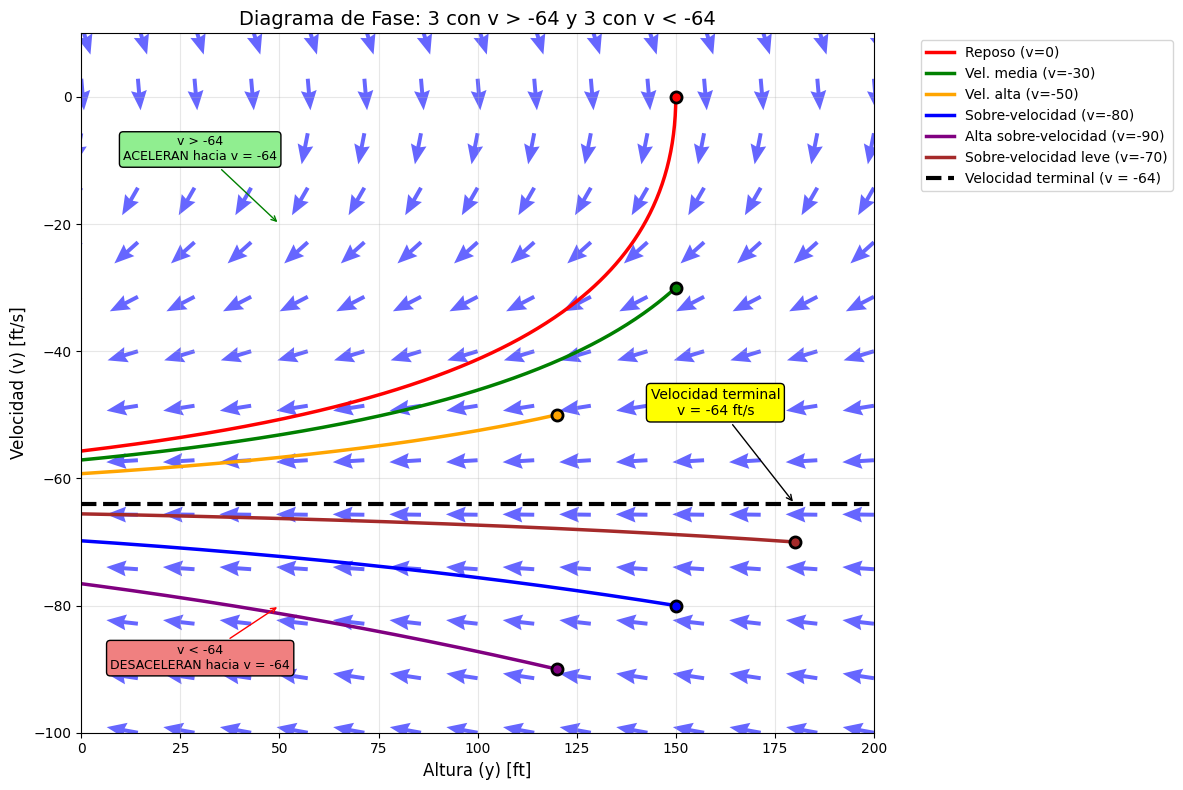

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def sistema(variables, t):
    y, v = variables
    dydt = v
    dvdt = -32 - 0.5*v
    return [dydt, dvdt]

plt.figure(figsize=(12, 8))

# Crear malla
y = np.linspace(0, 200, 15)
v = np.linspace(-100, 20, 15)
Y, V = np.meshgrid(y, v)

# Calcular las derivadas en cada punto
dYdt = V
dVdt = -32 - 0.5*V

# Normalizar las flechas (Visualización)
magnitud = np.sqrt(dYdt**2 + dVdt**2)
dYdt_norm = dYdt / (magnitud + 1e-8)
dVdt_norm = dVdt / (magnitud + 1e-8)

# Campo vectorial
plt.quiver(Y, V, dYdt_norm, dVdt_norm, color='blue', alpha=0.6, 
           scale=25, width=0.005, headwidth=4)

condiciones_iniciales = [
    # v > -64 (aceleran hacia la terminal)
    [150, 0],      # Reposo
    [150, -30],    # Velocidad media  
    [120, -50],    # Velocidad alta pero aún por encima
    
    # v < -64 (desaceleran hacia la terminal)
    [150, -80],    # Sobre-velocidad
    [120, -90],    # Alta sobre-velocidad
    [180, -70]     # Sobre-velocidad leve
]

colores = ['red', 'green', 'orange', 'blue', 'purple', 'brown']
nombres = [
    'Reposo (v=0)', 
    'Vel. media (v=-30)', 
    'Vel. alta (v=-50)',
    'Sobre-velocidad (v=-80)',
    'Alta sobre-velocidad (v=-90)', 
    'Sobre-velocidad leve (v=-70)'
]

# Tiempo de simulación
t = np.linspace(0, 6, 500)

for i, (y0, v0) in enumerate(condiciones_iniciales):
    sol = odeint(sistema, [y0, v0], t)
    plt.plot(sol[:, 0], sol[:, 1], color=colores[i], linewidth=2.5, label=nombres[i])
    # Marcar punto inicial
    plt.plot(y0, v0, 'o', color=colores[i], markersize=8, markeredgewidth=2, markeredgecolor='black')

# Línea de velocidad terminal (dv/dt = 0)
plt.axhline(y=-64, color='black', linestyle='--', linewidth=3, 
            label='Velocidad terminal (v = -64)')

# Configurar el gráfico
plt.xlabel('Altura (y) [ft]', fontsize=12)
plt.ylabel('Velocidad (v) [ft/s]', fontsize=12)
plt.title('Diagrama de Fase: 3 con v > -64 y 3 con v < -64', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlim(0, 200)
plt.ylim(-100, 10)

# Añadir anotaciones explicativas
plt.annotate('v > -64\nACELERAN hacia v = -64', 
             xy=(50, -20), xytext=(30, -10), ha='center', fontsize=9,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"),
             arrowprops=dict(arrowstyle="->", color='green'))

plt.annotate('v < -64\nDESACELERAN hacia v = -64', 
             xy=(50, -80), xytext=(30, -90), ha='center', fontsize=9,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"),
             arrowprops=dict(arrowstyle="->", color='red'))

plt.annotate('Velocidad terminal\nv = -64 ft/s', 
             xy=(180, -64), xytext=(160, -50), ha='center', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow"),
             arrowprops=dict(arrowstyle="->", color='black'))

plt.tight_layout()
plt.show()

